# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

> The No-show appointments dataset contains medical appointment records for over 100,000 patients in Brazil. The dataset captures whether or not a patient showed up to their scheduled medical appointment, along with key attributes about the patient and appointment such as: `PatientId`, `AppointmentID`, `ScheduledDay`, and `No-show` that shows whether the patient did or did not show up.


### Question(s) for Analysis
> We will investigate the following questions:  
> • What factors are associated with a higher chance of missing an appointment?  
> • Does receiving an SMS reduce the probability of missing an appointment?  
> • Are older patients more likely to show up to their appointments?

<a id='wrangling'></a>
## Data Wrangling

### General Properties
>In this section, we will load the dataset and take an initial look at its structure.  
We'll examine the number of rows and columns, data types, and check for any missing or unusual values that may need to be cleaned before analysis.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Data Cleaning


In [3]:
# Load the dataset
df = pd.read_csv('KaggleV2-May-2016.csv')

# Display the first few rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
print("Dataset shape:", df.shape)
print("\nDataset info:")
df.info()

Dataset shape: (110527, 14)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Check for missing values
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


The dataset contains over 100,000 rows and 14 columns.  
There are no missing values in any of the columns. However, some column names use inconsistent casing and special characters, and some may be renamed for clarity.  
Additionally, the 'No-show' column is a bit counterintuitive since a value of "No" means the patient **did show up**. This will be addressed in the next section.

# Data Cleaning
We will now perform the following cleaning steps:
- Rename column names to follow consistent lowercase naming with underscores.
- Convert 'ScheduledDay' and 'AppointmentDay' to datetime format.
- Create a new binary column called `no_show_binary` where 1 = patient **did not show**, and 0 = patient **did show**.
- Remove duplicated rows if any.


In [6]:
# Rename columns for consistency
df.rename(columns=lambda x: x.strip().lower().replace('-', '_'), inplace=True)
df.rename(columns={'no_show': 'no_show'}, inplace=True)

In [7]:
# Convert dates
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [8]:
# Create binary target column: 1 = missed appointment, 0 = showed up
df['no_show_binary'] = df['no_show'].map({'Yes': 1, 'No': 0})

In [9]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Final check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

All column names have been cleaned and dates have been converted successfully.  
A new binary target column `no_show_binary` was created to make interpretation easier during analysis.  
There were no duplicate rows found or dropped.

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, we will explore the dataset using summary statistics and visualizations to answer our research questions:

1. What factors are associated with a higher chance of missing an appointment?  
2. Does receiving an SMS reduce the probability of missing an appointment?  
3. Are older patients more likely to show up to their appointments?



### Research Question 1
###(What factors are associated with a higher chance of missing an appointment?)

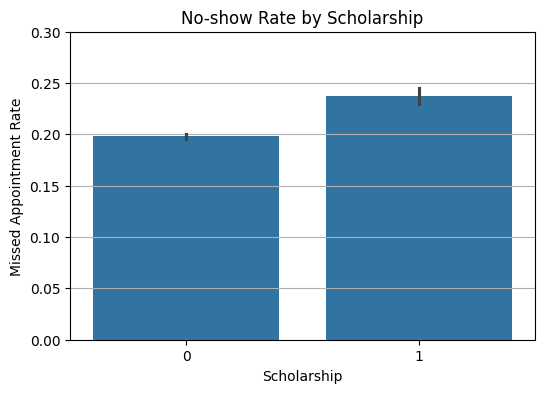

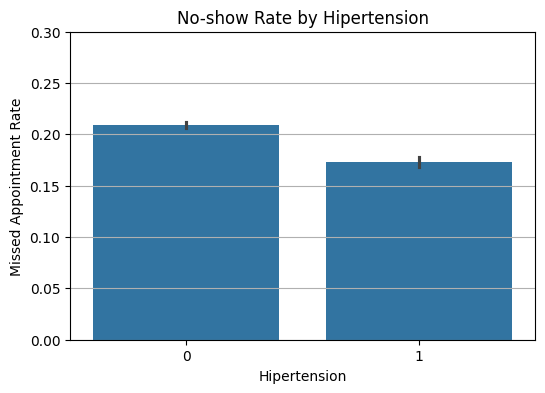

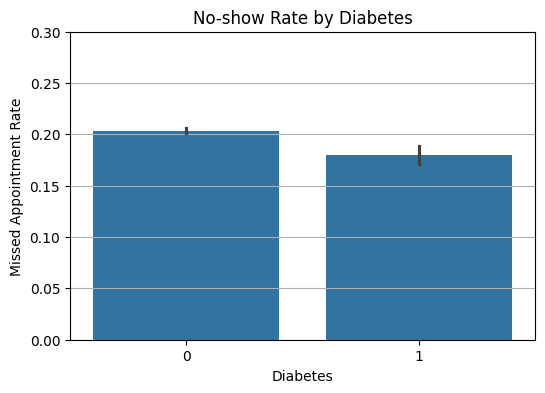

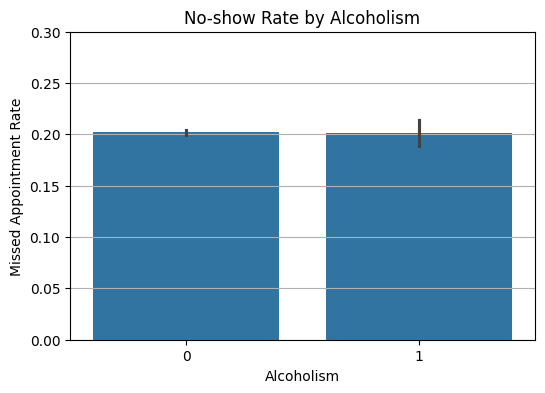

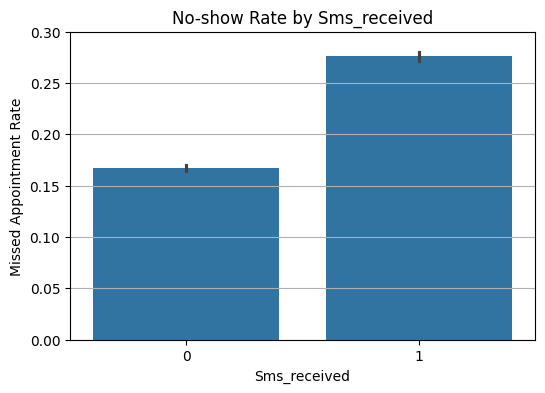

In [11]:
# Plot no-show rates by different factors
factors = ['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'sms_received']

for col in factors:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='no_show_binary', data=df)
    plt.title(f'No-show Rate by {col.capitalize()}')
    plt.ylabel('Missed Appointment Rate')
    plt.xlabel(col.capitalize())
    plt.ylim(0, 0.3)
    plt.grid(axis='y')
    plt.show()

From the charts above, we can observe the effect of each factor on missed appointment rates.

- **Scholarship**: Patients enrolled in the Bolsa Família program had a slightly higher no-show rate.
- **Hypertension & Diabetes**: Patients with chronic conditions (hypertension or diabetes) showed marginally **better** attendance.
- **Alcoholism**: Slight increase in no-show rate.
- **SMS Received**: Surprisingly, patients who received SMS reminders had a **higher** no-show rate, which we will investigate further in the next question.

### Research Question 2  
###(Does receiving an SMS reduce the probability of missing an appointment?)

sms_received
0    0.167033
1    0.275745
Name: no_show_binary, dtype: float64


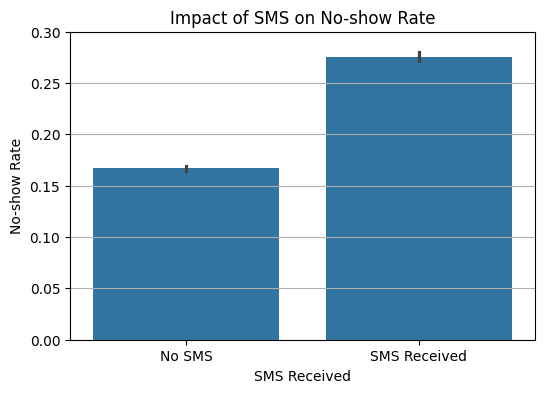

In [12]:
# Group by SMS_received and calculate no-show rates
sms_impact = df.groupby('sms_received')['no_show_binary'].mean()
print(sms_impact)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='sms_received', y='no_show_binary', data=df)
plt.title('Impact of SMS on No-show Rate')
plt.xlabel('SMS Received')
plt.ylabel('No-show Rate')
plt.xticks([0,1], ['No SMS', 'SMS Received'])
plt.ylim(0, 0.3)
plt.grid(axis='y')
plt.show()

Interestingly, patients who **received** an SMS reminder had a higher no-show rate (~27%) than those who did not (~17%).  
This could be due to underlying confounding factors, such as SMS being sent to patients already identified as high risk.  
Thus, receiving an SMS does **not** appear to reduce no-show rates in this dataset.

### Research Question 3  
###(Are older patients more likely to show up to their appointments?)

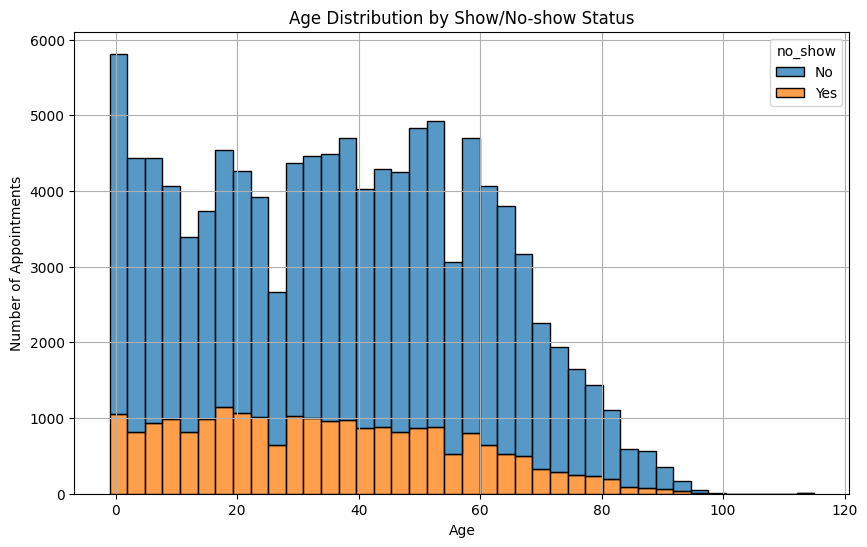

In [13]:
# Plot Age vs no-show
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='no_show', multiple='stack', bins=40)
plt.title('Age Distribution by Show/No-show Status')
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
plt.grid(True)
plt.show()

From the histogram, we observe that:
- Younger patients are **more likely** to miss their appointments.
- Older patients tend to **attend** more consistently.
- Very young children (0–10 years) also show a relatively high attendance, possibly due to parental involvement.
Overall, increasing age seems to correlate with a **lower** chance of missing the appointment.

<a id='conclusions'></a>
## Conclusions

### Summary of Findings

This analysis investigated the **No-show Medical Appointments** dataset to understand the factors contributing to missed appointments.

The following questions were explored:

1. **What factors are associated with a higher chance of missing an appointment?**  
   - Patients who received **scholarships** and those with a history of **alcoholism** had slightly higher no-show rates.
   - Patients with **chronic conditions** like hypertension or diabetes had slightly better attendance.

2. **Does receiving an SMS reduce the probability of missing an appointment?**  
   - Patients who received SMS reminders were **more likely** to miss their appointments.

3. **Are older patients more likely to show up to their appointments?**  
   - Yes. The data shows that **older patients** tend to attend their appointments more consistently than younger ones.  
   - Younger patients (especially in their 20s) had noticeably higher no-show rates.

---

### Limitations

- The dataset does not provide **reasons** for no-shows, which limits interpretability.
- No consideration was given to **time-based trends**.
- The SMS outcome may be influenced by **targeted messaging** rather than a random control.

---

### Recommendations

- Consider collecting **qualitative feedback** from patients to understand their barriers to attending.
- Further analysis with **causal modeling** or experiments could validate whether interventions like SMS truly help.

---

**Final Thoughts**  
This project illustrates how simple data exploration with pandas and NumPy can uncover insights from real-world datasets.  
With more data and deeper modeling, hospitals may better predict and reduce missed appointments, improving healthcare efficiency.
